<a href="https://colab.research.google.com/github/ahshawaf/AML/blob/project6/Project6_Team1_Ahmad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:

# Common Import
import sklearn
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import os
import time

# to make this notebook's output stable across runs
np.random.seed(42)

from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")

# sklearn version > 0.20 is required 
sklearn.__version__
# Update sklearn -> !pip install -U scikit-learn


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'0.22.2.post1'

#Custom Functions

This is a fucntion to download a file using **URL**. Then save it in the **save_path** with **target_file_name**. If target_file_name is empty, then the file name will be gotten from the URL.

In [0]:
import urllib
import urllib.parse as parse

def download(url,save_path,target_file_name=''):
  print("file is being downloading from {} ...".format(url))
  file = urllib.request.urlopen(url)
  fileData = file.read()

  if target_file_name=='':
    split=parse.urlsplit(url)
    target_file_name = split.path.split('/')[-1]
  
  if not os.path.exists(save_path):
    os.mkdir(save_path)

  targetFile = os.path.join(save_path,target_file_name)
  with open(targetFile,'wb') as f:
    f.write(fileData)
  print('Done, file in the path {}'.format(targetFile))

This is a function to extract tar file in the **tar_file_path**, which includes the file name and the extension, to **target_path**.

In [0]:
def extractTar(tar_file_path,target_path):
    print("Extracting is starting....")
    tar=tarfile.open(tar_file_path)
    tar.extractall(target_path)
    tar.close()
    print("Done")

This is a function to extract zip file in the **zip_file_path**, which includes the file name and the extension, to **target_path**.

In [0]:
def extractZip(zip_file_path,target_path):
    print("Extracting is starting....")
    zFile=ZipFile(zip_file_path)
    zFile.extractall(target_path)
    zFile.close()
    print("Done")

randomly_sho_imgs is for randomly display nrows x ncols images from the training set 

In [0]:
def randomly_show_imgs(x_set,nrows,ncols):
  plt.figure(figsize=(10,10))
  for i in range(nrows*ncols):
    plt.subplot(nrows,ncols,i+1)
    indx = random.randint(0,len(x_set))
    plt.imshow(x_set[indx])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
  plt.show()

create the following directeries to save the **downsampled and celeba datasets**

In [0]:
root_path = 'data'
os.mkdir(root_path)

downsampled_path = os.path.join(root_path,'downsampled')
os.mkdir(downsampled_path)

celeba_path = os.path.join(root_path,'celeba')
os.mkdir(celeba_path)


#Downsampled Dataset

##Loading Downsampled Dataset

here, the downsampled dataset will be downloaded using the custom function download using the URL http://image-net.org/small/train_32x32.tar which is the training set. For the validation test the URL is http://image-net.org/small/valid_32x32.tar

Downsampled source website: http://image-net.org/small/download.php




In [6]:
url = 'http://image-net.org/small/train_32x32.tar'
save_path = downsampled_path
download(url,save_path=save_path)

file is being downloading from http://image-net.org/small/train_32x32.tar ...
Done, file in the path data/downsampled/train_32x32.tar


Extract the train_32x32 dataset to the path data/downsampled/imgs/

In [7]:
extractTar(os.path.join(downsampled_path,'train_32x32.tar'),os.path.join(downsampled_path,'imgs'))

Extracting is starting....
Done


##Exploring Data 

list randomly 10 images of the training data

In [26]:
main_path = os.path.join(downsampled_path,'imgs/train_32x32/')

dsp_lst=os.listdir(main_path)
len(dsp_lst)

1281149

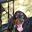

image size (32, 32, 3) 


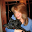

image size (32, 32, 3) 


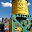

image size (32, 32, 3) 


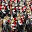

image size (32, 32, 3) 


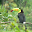

image size (32, 32, 3) 


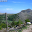

image size (32, 32, 3) 


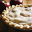

image size (32, 32, 3) 


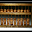

image size (32, 32, 3) 


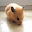

image size (32, 32, 3) 


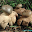

image size (32, 32, 3) 


In [27]:
for i in range(10):
  rndIndx=random.randint(0,len(dsp_lst)-1)
  imgPath = os.path.join(main_path,dsp_lst[rndIndx])
  img=cv2.imread(imgPath)
  cv2_imshow(img)
  print('image size {} '.format(img.shape))
   

##Creating Training Set

This is a custom function to create a imgs set without labels, unsupervised dataset. It used the folder path of the imgs.

In [0]:
def create_img_set(imgs_folder_path):
  x=[]
  lst = os.listdir(imgs_folder_path)
  for img in lst:
    img_imr = cv2.imread(os.path.join(imgs_folder_path,img))
    x.append(np.array(img_imr))
  return x

In [0]:
downsampled_imgs_folder_path = os.path.join(downsampled_path,'imgs/train_32x32')
dsp_x= create_img_set(downsampled_imgs_folder_path)

In [41]:
len(dsp_x)

1281149

Show randomly 25 images from the training set

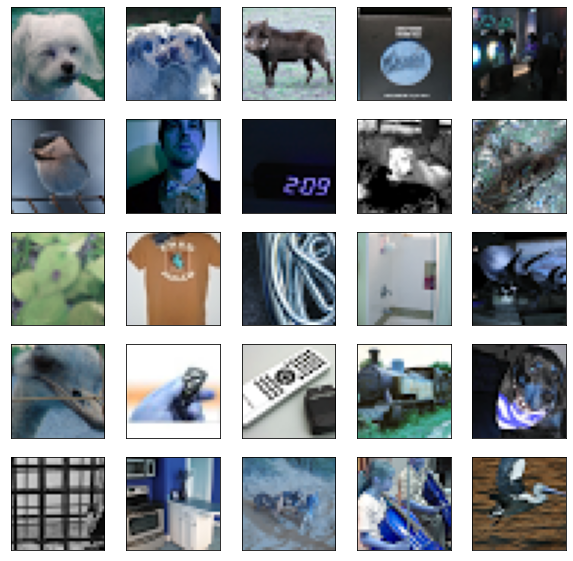

In [48]:
randomly_show_imgs(dsp_x,5,5)

Download Coil100 from Sean Kaggle

In [0]:
download('https://storage.googleapis.com/kaggle-data-sets/589973/1063434/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1586506868&Signature=OeomkNazrVOV6QMP6sd%2BMUJITjJSg0lk5tIpWhJOwU4c4VCK7E3PxxEKlovk4x8XBGKmtL90cQUy5BoQSo%2BdulwmSx41RqZYkRHPMyvhgydFX0wAol%2Fy75828DdowN37isM04sYFTD4PleKuj7hD95bFWvv1mKSh0w%2BIZAEaMsS6bOvqPpXkJYN1G8mffLUFWpKGklEX6Y4ERiMGhIlQBp9RH1WHAYSyoreld0g02%2FkrVzub8i%2B9D1sOPfG%2F8VfXgxyVoACA2lSRJycZ7me2wuAmBLx%2FlhivpHI2dLZ%2BBymxtmxhvDnDioxDl7wwQqYqy9MMUAlXPZPvlMJ%2Baf%2FaLQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dcoil100.zip',os.path.join(root_path,'coil100'),'coil100.zip')

file is being downloading from https://storage.googleapis.com/kaggle-data-sets/589973/1063434/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1586506868&Signature=OeomkNazrVOV6QMP6sd%2BMUJITjJSg0lk5tIpWhJOwU4c4VCK7E3PxxEKlovk4x8XBGKmtL90cQUy5BoQSo%2BdulwmSx41RqZYkRHPMyvhgydFX0wAol%2Fy75828DdowN37isM04sYFTD4PleKuj7hD95bFWvv1mKSh0w%2BIZAEaMsS6bOvqPpXkJYN1G8mffLUFWpKGklEX6Y4ERiMGhIlQBp9RH1WHAYSyoreld0g02%2FkrVzub8i%2B9D1sOPfG%2F8VfXgxyVoACA2lSRJycZ7me2wuAmBLx%2FlhivpHI2dLZ%2BBymxtmxhvDnDioxDl7wwQqYqy9MMUAlXPZPvlMJ%2Baf%2FaLQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dcoil100.zip ...
Done, file in the path data/coil100/coil100.zip


In [0]:
extractZip('data/coil100/coil100.zip','data/coil100/imgs')

Extracting is starting....
Done


In [0]:
coil_lst = os.listdir('data/coil100/imgs/coil-100')

In [0]:
len(coil_lst)

7202

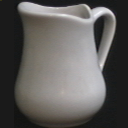

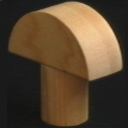

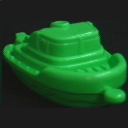

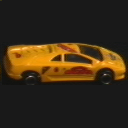

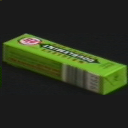

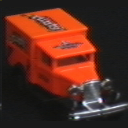

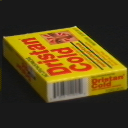

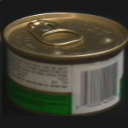

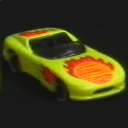

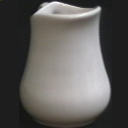

In [0]:
for i in range(10):
  rndIndx = random.randint(0,len(coil_lst)-1)
  img = cv2.imread(os.path.join('data/coil100/imgs/coil-100',coil_lst[rndIndx]))
  cv2_imshow(img)

#Refrences

https://stackoverflow.com/questions/16760992/how-to-download-a-zip-file-from-a-site-python

https://stackabuse.com/download-files-with-python/

